In [106]:
# Import libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder


# For reproducibility
np.random.seed(42)

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras import utils
from tensorflow.python.keras.datasets import mnist

%matplotlib inline

In [107]:
os.getcwd()

'C:\\Users\\Owen\\Desktop\\GA\\11.04-lesson-cnn\\solution-code'

Load the training data (train.csv) from Kaggle

In [108]:
train_df = pd.read_csv('train.csv')

Setup X and y (feature matrix and target vector)

In [109]:
train_df.shape

(42000, 785)

In [110]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
train_df.pixel100.describe()

count    42000.000000
mean        13.072714
std         49.963775
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        255.000000
Name: pixel100, dtype: float64

In [112]:
y = train_df.label
X = train_df.drop(columns=['label'])

Split X and y into train and test subsets.

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

Preprocess your data

In [114]:
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)

In [115]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [116]:
X_train /= 255
X_test /= 255

In [117]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [118]:
X_train.shape

(31500, 28, 28, 1)

In [119]:
y_train.shape

(31500, 10)

Create your network.

In [120]:

model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

Train your network

Non CNN

In [121]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [122]:
history = model.fit(X_train, y_train,
                       batch_size = 256,
                       validation_data=(X_test,y_test),
                       epochs = 10,
                       verbose = 1)

Train on 31500 samples, validate on 10500 samples
Epoch 1/10
31500/31500 [==============================] - 1s 27us/sample - loss: 1.3758 - accuracy: 0.6128 - val_loss: 0.7796 - val_accuracy: 0.8101
Epoch 2/10
31500/31500 [==============================] - 0s 12us/sample - loss: 0.6087 - accuracy: 0.8423 - val_loss: 0.4993 - val_accuracy: 0.8655
Epoch 3/10
31500/31500 [==============================] - 0s 13us/sample - loss: 0.4430 - accuracy: 0.8781 - val_loss: 0.4070 - val_accuracy: 0.8871
Epoch 4/10
31500/31500 [==============================] - 0s 13us/sample - loss: 0.3759 - accuracy: 0.8966 - val_loss: 0.3647 - val_accuracy: 0.8956
Epoch 5/10
31500/31500 [==============================] - 0s 13us/sample - loss: 0.3392 - accuracy: 0.9045 - val_loss: 0.3397 - val_accuracy: 0.9037
Epoch 6/10
31500/31500 [==============================] - 0s 13us/sample - loss: 0.3167 - accuracy: 0.9107 - val_loss: 0.3226 - val_accuracy: 0.9084
Epoch 7/10
31500/31500 [==============================] 

Non CNN

In [123]:
# Add a convolutional layer.
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 6,            # number of filters
                     kernel_size = (3,3),        # height/width of filter
                     activation='relu',      # activation function 
                     input_shape=(28,28,1))) # shape of input (image)
cnn_model.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling
cnn_model.add(Conv2D(16,
                     kernel_size = (3,3),
                     activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

In [124]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [125]:
from keras.callbacks import EarlyStopping
early_stop= EarlyStopping(
        monitor='val_loss',
        min_delta=0,
        patience=5)

In [126]:
history = cnn_model.fit(X_train, y_train,
                       batch_size = 256,
                       validation_data=(X_test,y_test),
                       epochs = 15,
                       verbose = 1,
                       callbacks=[early_stop])

Train on 31500 samples, validate on 10500 samples
Epoch 1/15
31500/31500 [==============================] - 6s 189us/sample - loss: 0.8039 - accuracy: 0.7656 - val_loss: 0.2309 - val_accuracy: 0.9305
Epoch 2/15
31500/31500 [==============================] - 5s 152us/sample - loss: 0.1906 - accuracy: 0.9415 - val_loss: 0.1221 - val_accuracy: 0.9631
Epoch 3/15
31500/31500 [==============================] - 5s 153us/sample - loss: 0.1260 - accuracy: 0.9606 - val_loss: 0.0955 - val_accuracy: 0.9717
Epoch 4/15
31500/31500 [==============================] - 5s 155us/sample - loss: 0.1013 - accuracy: 0.9688 - val_loss: 0.0779 - val_accuracy: 0.9754
Epoch 5/15
31500/31500 [==============================] - 5s 155us/sample - loss: 0.0844 - accuracy: 0.9736 - val_loss: 0.0646 - val_accuracy: 0.9799
Epoch 6/15
31500/31500 [==============================] - 5s 153us/sample - loss: 0.0739 - accuracy: 0.9774 - val_loss: 0.0741 - val_accuracy: 0.9764
Epoch 7/15
31500/31500 [==========================

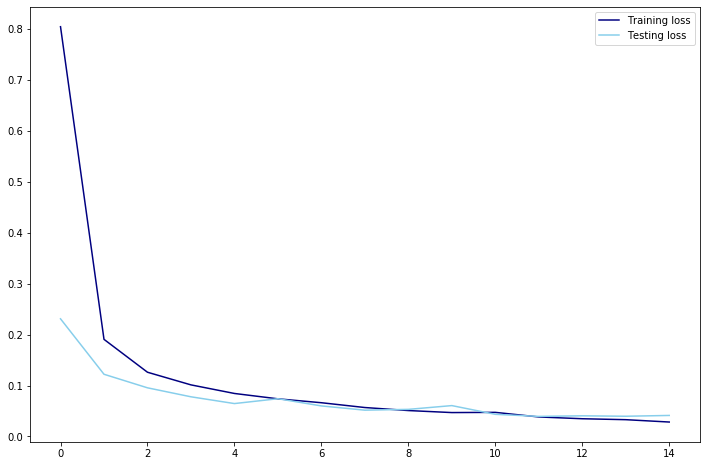

In [127]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

In [128]:
test_df = pd.read_csv('test.csv')

In [129]:
test_df.shape

(28000, 784)

In [131]:
X_kaggle = test_df

In [132]:
X_kaggle = X_kaggle.astype('float32')
X_kaggle/= 255

In [134]:
X_kaggle = X_kaggle.values.reshape(X_kaggle.shape[0], 28, 28, 1)

In [144]:
preds = cnn_model.predict_classes(X_kaggle)

In [154]:
preds_df = pd.DataFrame(preds).rename(columns={0:'Label'})

In [160]:
preds_df.to_csv('predictions_nn_kaggle.csv')